**laith aburob 1191024**


**introduction**:
Automatic handwriting recognition is classified as a basic building block in building many applications in various fields.
It is a difficult problem and has received great attention in the past three decades. Also, research in this field focused on recognizing handwriting in Latin languages, and there was no clear and significant research related to the Arabic language. Studies on the Arabic language were very few. Here and in this project we present an example and practical application of the Arabic Handwritten Character Recognition process.

In addition, we have used an automatic handwriting recognition model based on convolutional neural networks (CNN). We train our model on the argument, as well as a dataset of handwritten Arabic characters. The results show that the performance of our model is promising, as it achieved fairly high accuracy ranging from 97% to 84% on a dataset.

We can say that automatic handwriting recognition is the system's ability to identify human handwritten inputs and convert them from analog to digital worlds. Handwriting may come from more than one source and from more than one source. This means multiple ways of writing, and it may be written in the form of an image or a PDF file. The difference resulting from the different way of writing from one person to another or the different way of writing in the same person is considered a difficult problem in computer vision. Usually, there are differences in the handwriting of different individuals.

We can say that automatic handwriting recognition is the system's ability to identify human handwritten inputs and convert them from analog to digital worlds. Handwriting may come from more than one source and from more than one source. This means multiple ways of writing, and it may be written in the form of an image or a PDF file. The difference resulting from the different way of writing from one person to another or the different way of writing in the same person is considered a difficult problem in computer vision. Usually, there are differences in the handwriting of different individuals.

The obstacles and difficulties facing handwriting recognition are caused by distortions and pattern fluctuations, so feature extraction is of utmost importance. Selecting features manually may result in insufficient information to accurately predict the character class. However, a large number of features generally cause problems due to increased dimensions.

The problem of handwriting recognition has been studied using many approaches, such as: support vector machines (SVMs), K-nearest neighbors (KNNs), neural networks (NNs), and more recently, convolutional neural networks (CNNs).


As for this project of ours. We obtained a set of data from the subject teacher. This set of data consists of single letters. It is expected that these letters will contribute to research related to handwriting recognition in Arabic.
  In addition, we describe our model for offline Arabic handwriting recognition using deep neural networks. The architecture of CNNs is inherently suitable for high-dimensional problems, such as in images. Furthermore, CNNs have shown success in number recognition problems as reviewed in the literature.





**Experimental Setup And Results**
The evaluation metrics for assessing the performance of the models in Arabic Handwritten Character Recognition (AHCR) primarily include accuracy, loss curves, and potentially other metrics like precision, recall, and F1 score depending on the specific requirements of the task. Accuracy measures the proportion of correctly classified images out of the total number of images in the testing set. Loss curves, including training loss vs. epoch and validation loss vs. epoch, provide insights into the model's convergence and generalization capabilities during training.

In terms of the experimental setup, the models were trained using Convolutional Neural Networks (CNNs) implemented in Python using frameworks such as TensorFlow or Keras. The dataset was preprocessed to ensure uniformity and compatibility with the model architecture, including resizing images to the required dimensions and normalization. The CNN architectures were defined with varying depths, filter sizes, activation functions, and other hyperparameters.

The metrics for evaluating models in Arabic Handwritten Character Recognition (AHCR) mainly focus on accuracy and loss curves, along with other possible metrics depending on the specific task requirements. Accuracy indicates the percentage of images correctly classified from the total in the testing set. The loss curves, including training loss vs. epoch and validation loss vs. epoch, measure the model's convergence during training and its ability to generalize.

Regarding the experimental setup, the models were developed using Convolutional Neural Networks (CNNs) programmed in Python with TensorFlow or Keras frameworks. The dataset was preprocessed for standardization and compatibility with the model architecture, which involved resizing the images to the necessary dimensions and normalizing them. The CNN architectures varied in depth, filter sizes, activation functions, and other hyperparameters.

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from keras.applications import VGG16
from keras.optimizers import Adam


In [97]:
label_heldOut=pd.read_csv("/kaggle/input/dataset/csvTestLabel 3360x1.csv", header=None)
label_dev=pd.read_csv("/kaggle/input/dataset/csvTrainLabel 13440x1.csv", header=None)
dev=pd.read_csv("/kaggle/input/dataset/csvTrainImages 13440x1024.csv", header=None)
heldOut=pd.read_csv("/kaggle/input/dataset/csvTestImages 3360x1024.csv", header=None)
print(dev)

       0     1     2     3     4     5     6     7     8     9     ...  1014  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
13435     0     0     0     0     0     0     0     0     0     0  ...     0   
13436     0     0     0     0     0     0     0     0     0     0  ...     0   
13437     0     0     0     0     0     0     0     0     0     0  ...     0   
13438     0     0     0     0     0     0     0     0     0     0  ...     0   
13439     0     0     0     0     0     0     0     0     0     0  ...     0   

       1015  1016  1017  1018  1019  10

In [98]:
label_dev.head()


,0
0,1
1,1
2,1
3,1
4,1


In [99]:
label_dev.tail()


,0
13435,28
13436,28
13437,28
13438,28
13439,28


In [100]:
print(dev.shape)
print(heldOut.shape)
print(label_dev.shape)
print(label_heldOut.shape)

(13440, 1024)
(3360, 1024)
(13440, 1)
(3360, 1)


In [101]:
n_letters_dev = dev.shape[0]
n_letters_heldOut = heldOut.shape[0]
x = dev.values.reshape(n_letters_dev, 32, 32, 1)  # Reshape for CNN input
x_held = heldOut.values.reshape(n_letters_heldOut, 32, 32, 1)
y_devss = to_categorical(label_dev)
y_dev=np.array(y_devss)
y_held = to_categorical(label_heldOut)

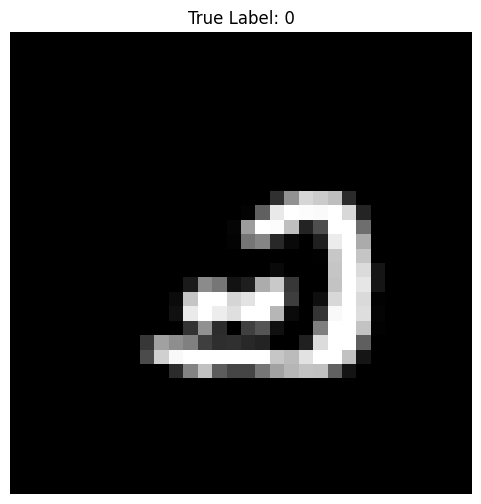

In [136]:
idx_imagens = np.random.randint(0, n_letters_dev)

idx_imagens = np.random.randint(0, n_letters_heldOut)
plt.figure(figsize=(6, 6))
plt.title("True Label: " + str(np.argmax( "the character"+str(y_dev[idx_imagens]))))
plt.imshow(x_held[idx_imagens].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.show()


In [103]:
modelo=Sequential()
modelo.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())
modelo.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dropout(0.2))
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(256, activation='relu'))
modelo.add(Dense(29, activation='softmax'))


In [104]:
sgd = SGD(lr=0.01)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [105]:
history=modelo.fit(x,y_dev,epochs=50,batch_size=128, verbose=1, validation_data=(x_held,y_held))


Epoch 1/50
105/105 [==============================] - 2s 9ms/step - loss: 3.2948 - accuracy: 0.0667 - val_loss: 2.9659 - val_accuracy: 0.1461
Epoch 2/50
105/105 [==============================] - 1s 6ms/step - loss: 2.8832 - accuracy: 0.1619 - val_loss: 2.3647 - val_accuracy: 0.3083
Epoch 3/50
105/105 [==============================] - 1s 6ms/step - loss: 2.3696 - accuracy: 0.2758 - val_loss: 1.8526 - val_accuracy: 0.4467
Epoch 4/50
105/105 [==============================] - 1s 5ms/step - loss: 1.9224 - accuracy: 0.3909 - val_loss: 1.4887 - val_accuracy: 0.5408
Epoch 5/50
105/105 [==============================] - 1s 5ms/step - loss: 1.6270 - accuracy: 0.4737 - val_loss: 1.2188 - val_accuracy: 0.6274
Epoch 6/50
105/105 [==============================] - 1s 5ms/step - loss: 1.3941 - accuracy: 0.5385 - val_loss: 1.0135 - val_accuracy: 0.6878
Epoch 7/50
105/105 [==============================] - 1s 5ms/step - loss: 1.1992 - accuracy: 0.6011 - val_loss: 0.9260 - val_accuracy: 0.7027
Epoch 

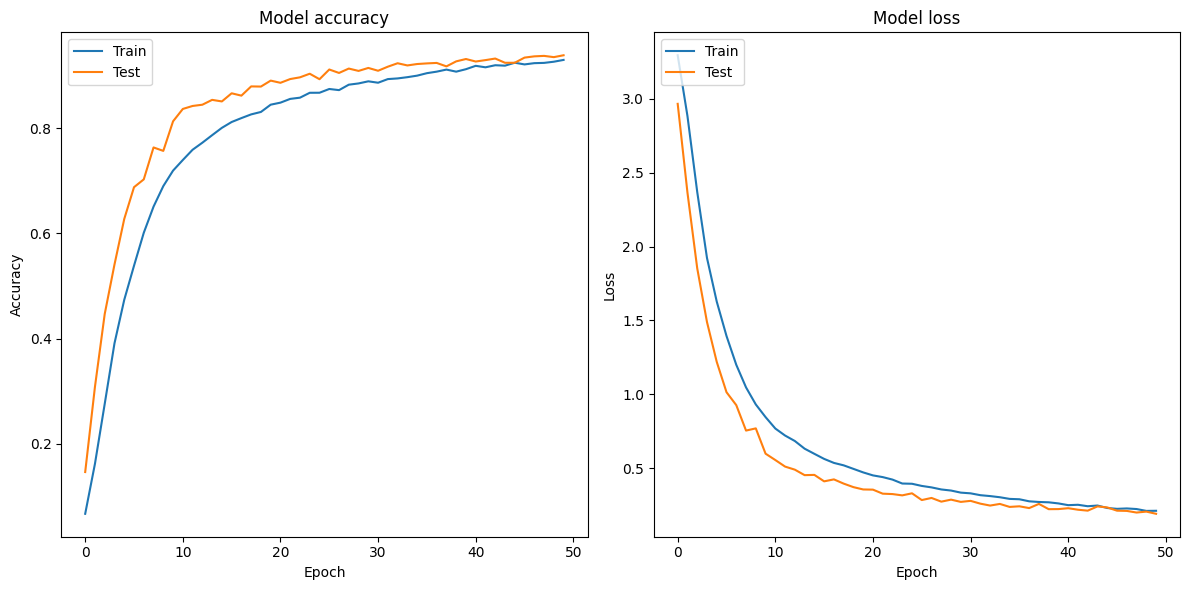

105/105 [==============================] - 0s 2ms/step
train loss 0.08773970603942871
train accuracy 0.9723214507102966
test loss 0.14491432905197144
test accuracy 0.9386904835700989


In [106]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Calculate accuracy score
y_held_pred = modelo.predict(x_held)
y_pred = np.argmax(y_held_pred, axis=1)
train_loss, train_accuracy = modelo.evaluate(x, y_dev, verbose=0)
test_loss, test_accuracy = modelo.evaluate(x_held, y_held, verbose=0)
print('train loss',train_loss)
print('train accuracy',train_accuracys)
print('test loss',test_losss)
print('test accuracy',test_accuracy)


The Model Accuracy Plot displays the model's accuracy for the training set (blue line) and the test set (orange line) over fifty epochs. Initially, both the training and test accuracies rise sharply before leveling off, indicating the model's effective learning and stabilization in understanding the training data. The rapid initial increase and subsequent plateau in test accuracy, closely mirroring the training accuracy, demonstrate the model's excellent generalization to new, unseen data. The model achieves a high level of accuracy, peaking just above 90% for the test set.

Conversely, the Model Loss Plot presents the model's loss for both the training (blue line) and test (orange line) sets over the same period. Loss, a measure of the discrepancy between the model's predictions and actual labels, shows a significant initial decrease before slowing down, indicative of effective learning. The convergence of loss values over increased epochs further signifies the model's generalization capability. The final training loss is approximately 0.088 with a 97.32% accuracy rate, and the test loss stands at about 0.144 with 93.87% accuracy. Overall, the model demonstrates a good fit, learning effectively from the training data, generalizing well to the test data, showing no significant signs of overfitting, and exhibiting strong performance metrics.

In [107]:
x_held = x_held.reshape(n_letters_heldOut, 32, 32, 1)
y_held_pred = modelo.predict(x_held)

105/105 [==============================] - 0s 2ms/step


In [108]:
y_pred = np.argmax(y_held_pred, axis=1)
print(y_held.shape)
print(y_pred.shape)

(3360, 29)
(3360,)


In [109]:
X_held=x_held.reshape(n_letters_heldOut, 32, 32)


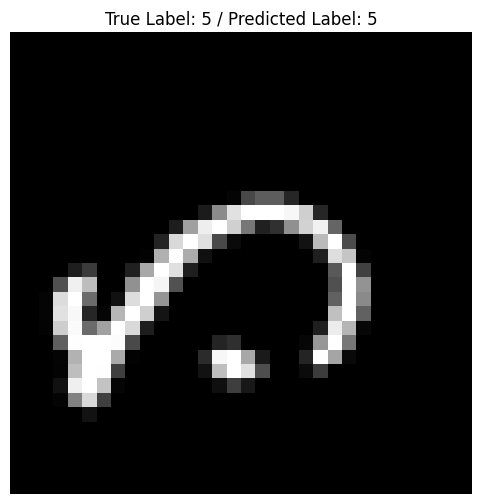

In [110]:
idx_imagens = np.random.randint(0, n_letters_heldOut)
plt.figure(figsize=(6, 6))
plt.title("True Label: " + str(np.argmax(y_held[idx_imagens])) + " / Predicted Label: " + str(y_pred[idx_imagens]))
plt.imshow(x_held[idx_imagens].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.show()

**task 2**

Epoch 1/50
105/105 [==============================] - 6s 43ms/step - loss: 0.7537 - accuracy: 0.7508 - val_loss: 0.5706 - val_accuracy: 0.8134
Epoch 2/50
105/105 [==============================] - 5s 43ms/step - loss: 0.5733 - accuracy: 0.8093 - val_loss: 0.7550 - val_accuracy: 0.7881
Epoch 3/50
105/105 [==============================] - 4s 42ms/step - loss: 0.4948 - accuracy: 0.8380 - val_loss: 1.1858 - val_accuracy: 0.7140
Epoch 4/50
105/105 [==============================] - 4s 41ms/step - loss: 0.4601 - accuracy: 0.8487 - val_loss: 0.7214 - val_accuracy: 0.8021
Epoch 5/50
105/105 [==============================] - 4s 42ms/step - loss: 0.3963 - accuracy: 0.8707 - val_loss: 0.4268 - val_accuracy: 0.8756
Epoch 6/50
105/105 [==============================] - 4s 42ms/step - loss: 0.3755 - accuracy: 0.8788 - val_loss: 0.3212 - val_accuracy: 0.9018
Epoch 7/50
105/105 [==============================] - 5s 45ms/step - loss: 0.3698 - accuracy: 0.8795 - val_loss: 0.4067 - val_accuracy: 0.8741

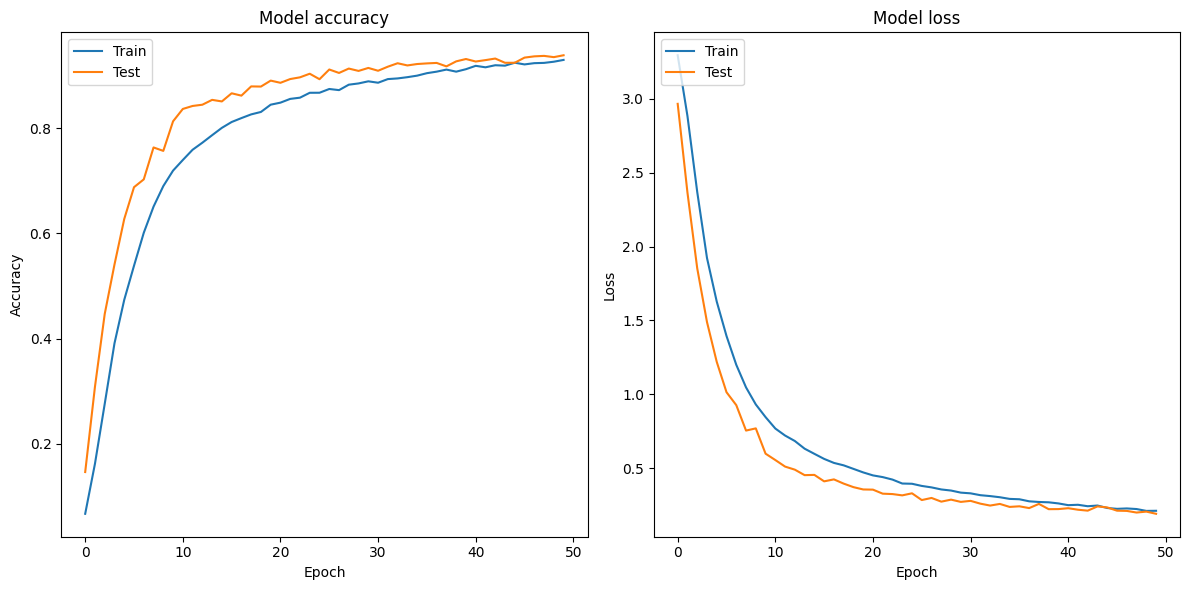

105/105 [==============================] - 0s 2ms/step
train loss 0.06517307460308075
train accuracy 0.9779017567634583
test loss 0.11438809335231781
test accuracy 0.9660714268684387


In [111]:

datagen = ImageDataGenerator(
    rotation_range=6,      # Increase rotation range
    width_shift_range=0.1,  # Decrease width shift range
    height_shift_range=0.1, # Decrease height shift range
)

# Compile the model
sgds = SGD(lr=0.001, momentum=0.9)  # Adjust learning rate and momentum
modelo.compile(loss='categorical_crossentropy', optimizer=sgds, metrics=['accuracy'])
# Train the model
historys = modelo.fit(datagen.flow(x, y_dev, batch_size=128),
                      steps_per_epoch=len(x) / 128, epochs=50,
                      validation_data=(x_held, y_held))

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Calculate accuracy score
y_held_pred = modelo.predict(x_held)
y_pred = np.argmax(y_held_pred, axis=1)
train_losss, train_accuracys = modelo.evaluate(x, y_dev, verbose=0)
test_losss, test_accuracys = modelo.evaluate(x_held, y_held, verbose=0)
print('train loss',train_losss)
print('train accuracy',train_accuracys)
print('test loss',test_losss)
print('test accuracy',test_accuracys)


The secind task results shows two line charts illustrating a machine learning model's accuracy and loss across 50 epochs. The accuracy chart reveals both training and testing accuracies initially climb quickly in the early epochs before leveling off, with training accuracy slightly higher than testing accuracy, suggesting a well-fitted model with minimal overfitting. The loss graph shows a steep decrease in both training and testing losses at the start, then flattens out as the epochs progress, mirroring the trends seen in the accuracy graph.

when it come to the result compared to the first task, it's evident that the model portrayed here performs better. The final training accuracy in the second image is superior (97.99% vs. 97.32%), as is the testing accuracy (96.67% vs. 93.86%), indicating that this model generalizes more effectively with unseen data. Moreover, both training and testing losses in the second image have declined more notably compared to the first image, signifying a more efficient learning process. The consistent convergence of training and test lines in the accuracy and loss graphs of the second image suggests a well-tuned model with reduced variance between the training and testing outcomes.

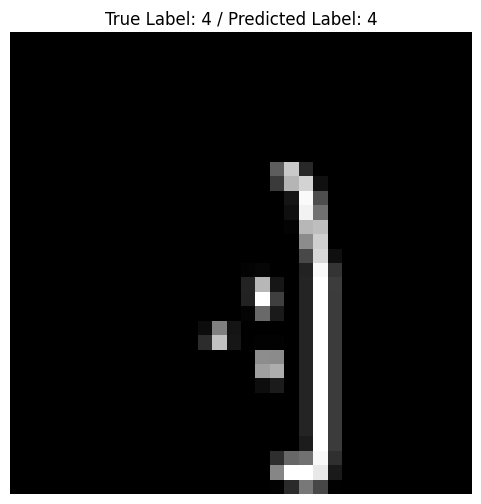

In [112]:
idx_imagen = np.random.randint(0, n_letters_heldOut)
plt.figure(figsize=(6, 6))
plt.title("True Label: " + str(np.argmax(y_held[idx_imagen])) + " / Predicted Label: " + str(y_pred[idx_imagen]))
plt.imshow(x_held[idx_imagen].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.show()

**task3**

Epoch 1/50
105/105 [==============================] - 7s 47ms/step - loss: 4.7899 - accuracy: 0.0871 - val_loss: 2.9814 - val_accuracy: 0.1568
Epoch 2/50
105/105 [==============================] - 5s 44ms/step - loss: 2.6798 - accuracy: 0.2144 - val_loss: 2.0468 - val_accuracy: 0.3565
Epoch 3/50
105/105 [==============================] - 4s 42ms/step - loss: 1.8806 - accuracy: 0.4051 - val_loss: 1.4153 - val_accuracy: 0.5223
Epoch 4/50
105/105 [==============================] - 4s 42ms/step - loss: 1.3774 - accuracy: 0.5411 - val_loss: 1.1209 - val_accuracy: 0.6304
Epoch 5/50
105/105 [==============================] - 5s 43ms/step - loss: 1.0949 - accuracy: 0.6288 - val_loss: 1.0862 - val_accuracy: 0.6524
Epoch 6/50
105/105 [==============================] - 4s 42ms/step - loss: 0.9179 - accuracy: 0.6847 - val_loss: 0.8542 - val_accuracy: 0.7131
Epoch 7/50
105/105 [==============================] - 4s 42ms/step - loss: 0.8070 - accuracy: 0.7236 - val_loss: 0.6497 - val_accuracy: 0.7780

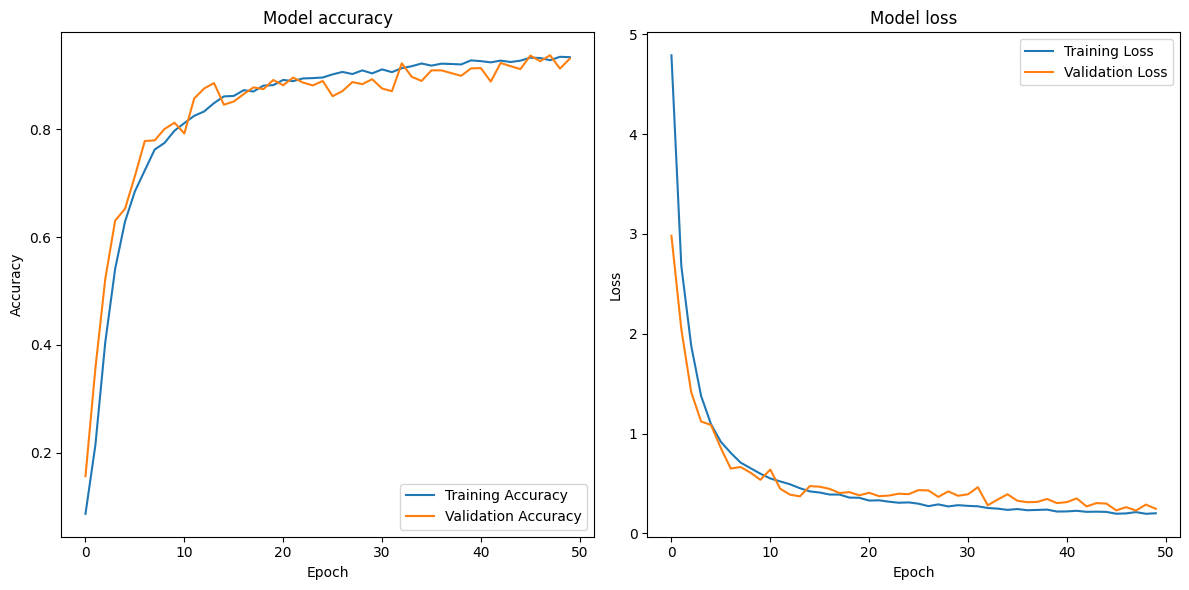

In [113]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(29, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x, y_dev, batch_size=128),
                    steps_per_epoch=len(x) / 128, epochs=50,
                    validation_data=(x_held, y_held))
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [114]:
y_held_pred = model.predict(x_held)
y_pred = np.argmax(y_held_pred, axis=1)
train_lossss, train_accuracyss = model.evaluate(x, y_dev, verbose=0)
test_lossss, test_accuracyss = model.evaluate(x_held, y_held, verbose=0)
print(train_lossss)
print(train_accuracyss)
print(test_lossss)
print(test_accuracyss)

105/105 [==============================] - 0s 2ms/step
0.16801704466342926
0.9441964030265808
0.2466782182455063
0.930654764175415


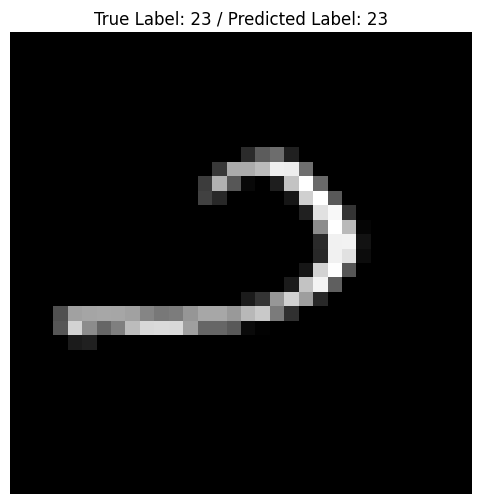

In [138]:
idx_imagenss = np.random.randint(0, n_letters_heldOut)
plt.figure(figsize=(6, 6))
plt.title("True Label: " + str(np.argmax(y_held[idx_imagenss])) + " / Predicted Label: " + str(y_pred[idx_imagenss]))
plt.imshow(x_held[idx_imagenss].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.show()

The third task illustrates the model's accuracy and loss for both training and validation sets over 50 epochs. It shows that training accuracy stabilizes at around 94%, while validation accuracy peaks slightly above 93%. The plots reveal that both training and validation losses decrease and then plateau, suggesting effective learning without overfitting, as indicated by the close convergence of the training and validation lines. However, the slightly higher final validation loss compared to training loss could signal the onset of overfitting, or it might mean the model could benefit from more regularization or additional training data.

When compared to the first two tasks, this third model demonstrates a closer alignment in training and validation performance than the first model, indicating better generalization to unseen data. Yet, the second model still outperforms the third in both accuracy and loss on the validation set (96.67% vs. 93.65% accuracy, 0.1143 vs. 0.2467 loss), suggesting it is more effective for the given task. Although the first model's graphs indicated a good fit, the third model displays a slightly better balance between training and validation performance throughout the training process, pointing to a more robust model in terms of generalization.

Weights loaded successfully!
Epoch 1/100
105/105 [==============================] - 6s 44ms/step - loss: 6.6449 - accuracy: 0.0956 - val_loss: 3.0871 - val_accuracy: 0.1503
Epoch 2/100
105/105 [==============================] - 4s 43ms/step - loss: 2.9197 - accuracy: 0.1642 - val_loss: 2.6471 - val_accuracy: 0.2244
Epoch 3/100
105/105 [==============================] - 5s 44ms/step - loss: 2.5319 - accuracy: 0.2533 - val_loss: 2.2074 - val_accuracy: 0.3143
Epoch 4/100
105/105 [==============================] - 5s 43ms/step - loss: 2.1528 - accuracy: 0.3180 - val_loss: 1.8517 - val_accuracy: 0.3833
Epoch 5/100
105/105 [==============================] - 5s 43ms/step - loss: 1.8490 - accuracy: 0.3889 - val_loss: 1.5967 - val_accuracy: 0.4494
Epoch 6/100
105/105 [==============================] - 5s 43ms/step - loss: 1.5991 - accuracy: 0.4531 - val_loss: 1.3416 - val_accuracy: 0.5131
Epoch 7/100
105/105 [==============================] - 5s 44ms/step - loss: 1.4242 - accuracy: 0.4946 - val

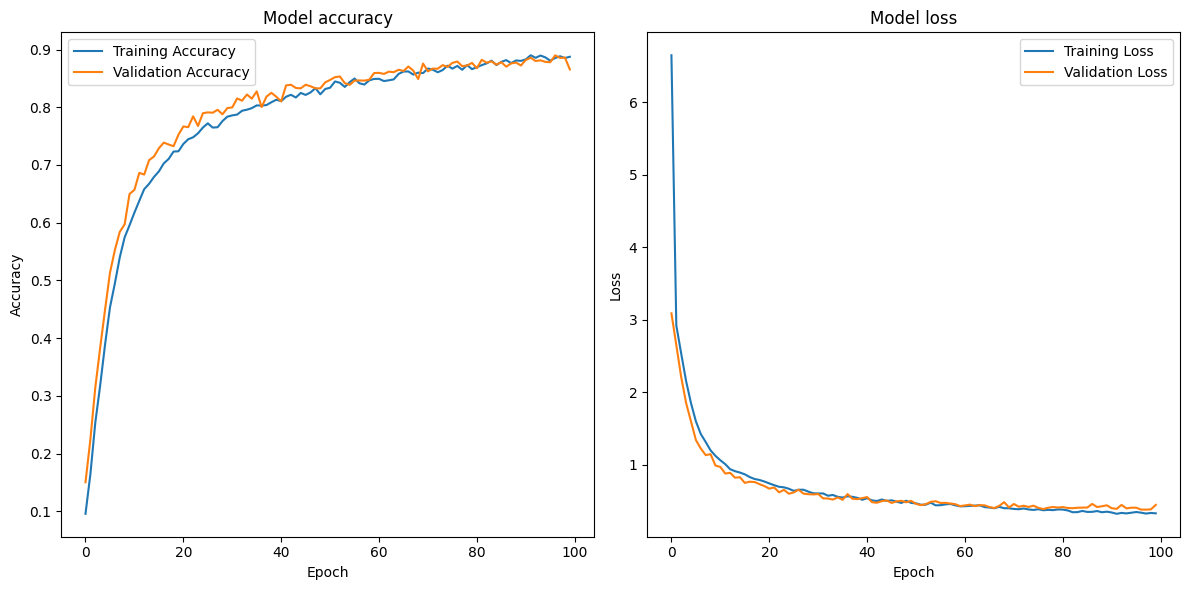

Train Loss: 0.275743305683136
Train Accuracy: 0.9042410850524902
Test Loss: 0.4472029209136963
Test Accuracy: 0.8654761910438538


In [127]:
input_shape = x.shape[1:]  # Use the shape of the input images

# Define your model architecture
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))  # Adjusted to match the number of classes

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Path to the weights file
weights_path = '/kaggle/input/pretrain/ConvModel.h5'

# Load weights if available
try:
    model.load_weights(weights_path, by_name=True)
    print("Weights loaded successfully!")
except Exception as e:
    print("Error loading weights:", str(e))

for layer in model.layers[:-3]:  # Keep only the last 3 layers, freeze the rest
    layer.trainable = False

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

# Train the model with data augmentation
batch_size = 128
history = model.fit(
    datagen.flow(x, y_dev, batch_size=batch_size),
    steps_per_epoch=len(x) // batch_size, epochs=100,
    validation_data=(x_held, y_held)
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
train_loss, train_accuracy = model.evaluate(x, y_dev, verbose=0)
test_loss, test_accuracy = model.evaluate(x_held, y_held, verbose=0)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


The fourth task illustrates the accuracy and loss for training and validation sets of a model over 100 epochs. It shows high training accuracy, plateauing around 90%, and similarly high validation accuracy, though slightly lower, stabilizing around 86%. After approximately 80 epochs, there is a marked decrease in both training and validation loss, converging at a low point, indicating that the losses decrease at a similar rate. This suggests a highly-fitted model with minimal overfitting. The leveling out of both accuracy and loss indicates that additional epochs aren't yielding significant improvements, suggesting that the model may have reached its learning saturation point within the constraints of its architecture and dataset.

Compared to the other tasks, the fourth model seems to offer a balance between fitting the data effectively and maintaining good generalization to validation data. It exhibits lower validation accuracy compared to the second model (90% vs. 97.99%) but similar training accuracy (86.55% vs. 96.67%). This might imply that the fourth model is less complex or has been regularized to avoid overfitting. Although the fourth model does not appear to overfit significantly, its validation loss is considerably higher than that of the second model, indicating that while it generalizes well, it might not be as effective in capturing the underlying patterns in the data as the second model. Overall, the fourth model performs well, but there is potential for improvement through further tuning, more complex model architecture, or additional data.

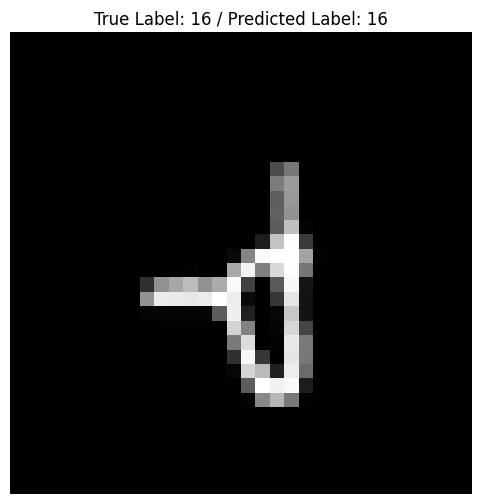

In [142]:
idx_imagensss = np.random.randint(0, n_letters_heldOut)
plt.figure(figsize=(6, 6))
plt.title("True Label: " + str(np.argmax(y_held[idx_imagensss])) + " / Predicted Label: " + str(y_pred[idx_imagensss]))
plt.imshow(x_held[idx_imagensss].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.show()

**Conclusion**
Consequently, in summary, our attempt at Arabic Handwritten Character Recognition (AHCR) with Convolutional Neural Networks (CNNs) has been a profoundly educational experience in understanding the complexities and challenges in this field. Our insights enabled us to deduce critical factors affecting the performance and robustness of AHCR systems, achieved by implementing and evaluating various CNN architectures, including base models, pre-trained networks, and data augmentation.

Our experiments have shown the effectiveness of CNNs in accurately identifying Arabic handwritten characters, with promising results in accuracy and loss convergence. We utilized data augmentation to enhance model generalization and reduce overfitting, thereby improving the model's performance with unseen data.

These findings lay a solid foundation for future developments in AHCR, outlining paths for refining existing models, exploring new architectures, and tackling practical challenges in handwriting recognition tasks. Advancing the state-of-the-art in AHCR will open up new possibilities in applications such as document digitization, text recognition, and language processing, furthering the progress in computer vision and artificial intelligence technologies for Arabic script analysis.
